# Homework 9

## 1. Closed Laptop Questions. 10 POINTS
Provide the binary values for each bit in the following numpy dtypes:  
    a. `np.int8(7)`   
    b. `np.int16(7)`   
    c. `np.uint8(4)`    

a. 00000111
b. 0000000000000111
c. 100

## 2. Closed Laptop Questions. 10 POINTS
Provide the strides for each of the folling numpy arrays:  
a. `np.array([[0, 1, 2], [3, 4, 5]], dtype='int32')`  
b. `np.array([[0, 1, 2], [3, 4, 5]], dtype='uint64')`  
c. `np.array([0, 1, 2, 3, 4, 5], dtype='uint32')`  

In [ ]:
a.(12,4)
b.(24,8)
c.(40,)

## 3. Consider the following Image. 
![img](whereswaldo.jpg)

### 10 POINTS. 
Consider that you can read this image into python and create a numpy array as follows:

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


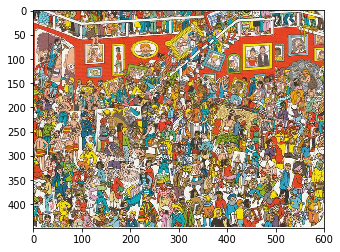

In [8]:
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
waldo = imread('whereswaldo.jpg')
plt.imshow(waldo)

In [9]:
waldo.shape

(449, 600, 3)

### Use array slicing/indexing to obtain a smaller image of the peron in the photo with the red mustache.
Try to get the crop as tight as possible. Save this crop as object named `red_mustache`.

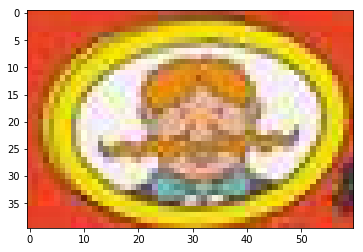

In [13]:
red_mustache=waldo[60:100, 200:260,]
plt.imshow(red_mustache)

### 10 POINTS.
What is the dimensions of this crop?  
What are the strides of this crop?

In [14]:
print(red_mustache.shape)
print(red_mustache.strides)

(40, 60, 3)
(1800, 3, 1)


### 10 POINTS.
Using the same dimensions as above, crop the original photo so that you get a crop of the man and woman in the picture on the wall. Save this crop as `man_woman`. It's okay if this picture isn't cropped as well, but it should have both people in the crop and have the same dimensions as the `red_mustache` crop.

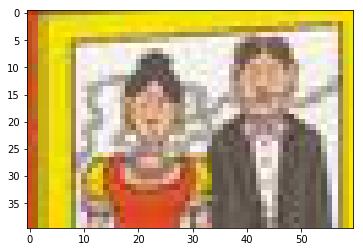

In [23]:
man_woman=waldo[70:110,430:490,]
plt.imshow(man_woman)

In [24]:
print(man_woman.shape)

(40, 60, 3)


### 10 POINTS.
Combine these two images to make one numpy array. Do this in a way that makes it easy for someone who uses the numpy array to quickly understand that it is two distinct arrays.

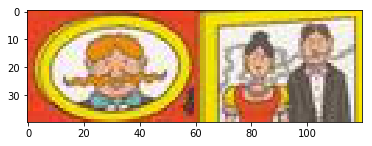

In [29]:
combined=np.hstack((red_mustache,man_woman))
plt.imshow(combined)

## Ordinary Least Squares. 40 Points.
Create a class called `OLS`. 
1. When creating an object from this new type, `OLS` should expect two numpy arrays: `x` and `y`. 
2. For this class, create a method called `beta_coef`. This function should take an optional parameter called `intercept`. If true this function will first add the intercept data to `x`, otherwise, if false, it will assume that information is already present. This function should then return the $\hat{\beta}$ coefficient vector of the least-squares estimate from a linear model.
3. Create a third method called ssr (model sum of squares). This method will calculate the `ssr` as follows:  
$(\hat{y}-\bar{y}_n)^{T}(\hat{y}-\bar{y_{n}})$  

This notation $y_{n}$ denotes a vector of means size $n$. $\hat{y}$ denotes a predicted value.

In [56]:
import numpy as np
import statsmodels.api as sm
from numpy.linalg import inv, qr, det

class OLS:
    def __init__(self,x,y):
        self.x=sm.add_constant(x)
        self.y=y
        
    def beta_coef(self,*args):
        x_new=self.x
        if len(args)!=0:
            x_new[:,0]=x_new[:,0]*args
            pass
        else:
            pass
        return inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)
    
    def ssr(self,*args):
        coeff=self.beta_coef(args)
        pred_y=self.x.dot(coeff)
        mean_y=np.array([self.y.mean()]*len(self.y))
        return (pred_y-mean_y).T.dot(pred_y-mean_y)
        
        
        
        
            
        
        

In [57]:
x=np.array([1,2,3])
y=np.array([3,5,7])
test=OLS(x,y)

test.beta_coef(1)
test.ssr(1)


(1,)
there's argument
[[1. 1.]
 [1. 2.]
 [1. 3.]]
((1,),)
there's argument
[[1. 1.]
 [1. 2.]
 [1. 3.]]


8.0